## Author - Mohammad Sajid Rajnagarwala

## Organisation - The Sparks Foundation

## Task 1 - Prediction using Supervised ML

Predict the percentage of marks of an student based on the number of study hours.



### Step 1 - Importing the libraries and dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Step 2 - Visualizing the dataset

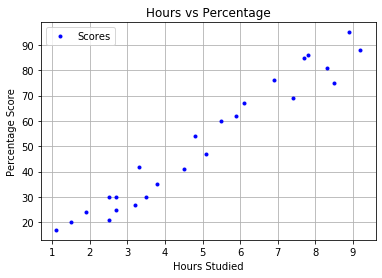

In [6]:
df.plot(x='Hours', y='Scores',style='.',color='blue')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.  

In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Step 3 - Data preparation and splitting the dataset

In [9]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [10]:
X = df.iloc[:,:1].values
Y = df.iloc[:,1:].values

In [11]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [12]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

### Step 4 - Training the algorithm

We have splitted our data into training and testing sets, and now we will train our Model.

In [14]:
from sklearn.linear_model import LinearRegression

l = LinearRegression()
l.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
l.coef_

array([[9.91065648]])

In [16]:
l.intercept_

array([2.01816004])

### Step 5 - Visualizing the model

After training the model, now its time to visualize it. 

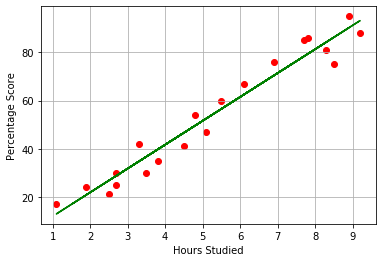

In [19]:
line = l.coef_*X+l.intercept_

plt.show()
plt.scatter(X_train, Y_train, color='red')
plt.plot(X, line, color='green')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

### Step 6 - Making predictions

Now that we have trained our algorithm, its time to make some predictions.

In [20]:
print(X_test)
Y_pred = l.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
comp = pd.DataFrame({'Actual':[Y_test],'Predicted':[Y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [22]:
# You can also test with your own data
hours = 9.25
own_pred = l.predict([[hours]])
print('Number of Hours ={}'.format(hours))
print('Predicted Score = {}'.format(own_pred[0]))

Number of Hours =9.25
Predicted Score = [93.69173249]


### Step 7 - Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare now well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics. 

In [23]:
from sklearn import metrics 

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002975
